In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
df=pd.read_csv('eda_data.csv')

In [3]:
df.head()

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,...,age,python_yn,R_yn,spark,aws,excel,job_simp,seniority,desc_len,num_comp
0,0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,...,47,1,0,0,0,1,data scientist,na,2536,0
1,1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,...,36,1,0,0,0,0,data scientist,na,4783,0
2,2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,...,10,1,0,1,0,1,data scientist,na,3461,0
3,3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,...,55,1,0,0,0,0,data scientist,na,3883,3
4,4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,...,22,1,0,0,0,1,data scientist,na,2728,3


In [4]:
#Choosing Relevant Columns
df.columns

Index(['Unnamed: 0', 'Job Title', 'Salary Estimate', 'Job Description',
       'Rating', 'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'same_state', 'age', 'python_yn', 'R_yn',
       'spark', 'aws', 'excel', 'job_simp', 'seniority', 'desc_len',
       'num_comp'],
      dtype='object')

In [5]:
df_model = df[['avg_salary','Rating','Size','Type of ownership','Industry','Sector','Revenue','num_comp','hourly','employer_provided',
             'job_state','same_state','age','python_yn','spark','aws','excel','job_simp','seniority','desc_len']]

In [6]:
# get dummy data 
df_dum = pd.get_dummies(df_model)

In [7]:
df_dum

,avg_salary,Rating,num_comp,hourly,employer_provided,same_state,age,python_yn,spark,aws,...,job_simp_analyst,job_simp_data engineer,job_simp_data scientist,job_simp_director,job_simp_manager,job_simp_mle,job_simp_na,seniority_jr,seniority_na,seniority_senior
0,72.0,3.8,0,0,0,0,47,1,0,0,...,0,0,1,0,0,0,0,0,1,0
1,87.5,3.4,0,0,0,0,36,1,0,0,...,0,0,1,0,0,0,0,0,1,0
2,85.0,4.8,0,0,0,1,10,1,1,0,...,0,0,1,0,0,0,0,0,1,0
3,76.5,3.8,3,0,0,1,55,1,0,0,...,0,0,1,0,0,0,0,0,1,0
4,114.5,2.9,3,0,0,1,22,1,0,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
737,84.5,3.9,3,0,0,0,190,0,0,1,...,0,0,0,0,0,0,1,0,0,1
738,102.5,4.4,3,0,0,0,14,1,1,1,...,0,1,0,0,0,0,0,0,0,1
739,73.5,2.6,0,0,0,1,36,0,0,0,...,0,0,0,0,0,0,1,0,1,0
740,127.5,3.2,0,0,0,0,-1,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [8]:
# train test split 
from sklearn.model_selection import train_test_split

In [9]:
X = df_dum.drop('avg_salary', axis =1)
y = df_dum.avg_salary.values

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=365)

In [11]:
# multiple linear regression 
import statsmodels.api as sm

X_sm = X = sm.add_constant(X)
model = sm.OLS(y,X_sm)
model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.708
Model:                            OLS   Adj. R-squared:                  0.638
Method:                 Least Squares   F-statistic:                     10.21
Date:                Thu, 11 Jan 2024   Prob (F-statistic):           1.47e-94
Time:                        13:19:08   Log-Likelihood:                -3311.6
No. Observations:                 742   AIC:                             6909.
Df Residuals:                     599   BIC:                             7568.
Df Model:                         142                                         
Covariance Type:            nonrobust                                         
=====================================================================================================================
                                                        coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
const                                                43.6206      6.718      6.493      0.000      30.427      56.814
Rating                                                3.6072      1.937      1.862      0.063      -0.197       7.412
num_comp                                              2.2503      0.868      2.592      0.010       0.545       3.955
hourly                                              -36.5646      9.173     -3.986      0.000     -54.580     -18.549
employer_provided                                    31.3732     11.524      2.722      0.007       8.741      54.006
same_state                                            2.4864      2.619      0.949      0.343      -2.657       7.629
age                                                   0.0352      0.030      1.172      0.242      -0.024       0.094
python_yn                                             8.1375      2.523      3.225      0.001       3.182      13.093
spark                                                -0.5710      2.920     -0.196      0.845      -6.307       5.165
aws                                                   1.1218      2.736      0.410      0.682      -4.251       6.495
excel                                                -0.4049      2.268     -0.179      0.858      -4.858       4.049
desc_len                                             -0.0001      0.001     -0.171      0.864      -0.002       0.001
Size_-1                                              13.6113      8.629      1.577      0.115      -3.335      30.558
Size_1 to 50 employees                                1.1067      6.501      0.170      0.865     -11.660      13.874
Size_10000+ employees                                -2.8817      5.800     -0.497      0.619     -14.272       8.509
Size_1001 to 5000 employees                           6.1362      3.878      1.582      0.114      -1.481      13.753
Size_201 to 500 employees                             2.2568      3.873      0.583      0.560      -5.350       9.864
Size_5001 to 10000 employees                         -3.8766      5.440     -0.713      0.476     -14.561       6.808
Size_501 to 1000 employees                            2.1829      4.059      0.538      0.591      -5.790      10.155
Size_51 to 200 employees                              4.2001      4.422      0.950      0.343      -4.484      12.884
Size_Unknown                                         20.8850     13.992      1.493      0.136      -6.594      48.363
Type of ownership_-1                                 13.6113      8.629      1.577      0.115      -3.335      30.558
Type of ownership_College / University                6.4226     17.739      0.362      0.717     -28.415      41.260
Type of ownersh

In [12]:
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import cross_val_score

In [13]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [14]:
# Find the R-squared of the model
lm.score(X_train,y_train)

0.7335252376797332

In [15]:
y_hat = lm.predict(X_train)

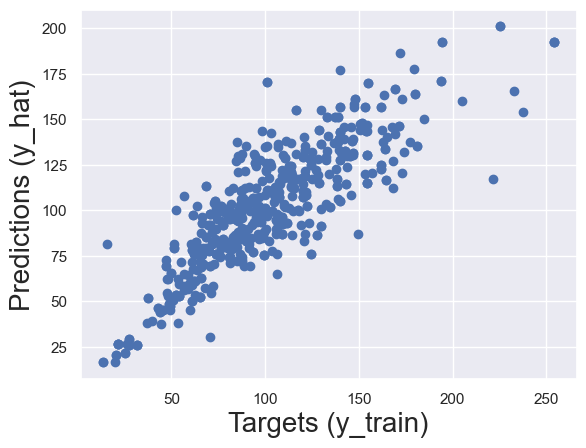

In [16]:
plt.scatter(y_train, y_hat)
plt.xlabel('Targets (y_train)',size=20)
plt.ylabel('Predictions (y_hat)',size=20)
plt.show()

C:\Users\DELL\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Residuals PDF')

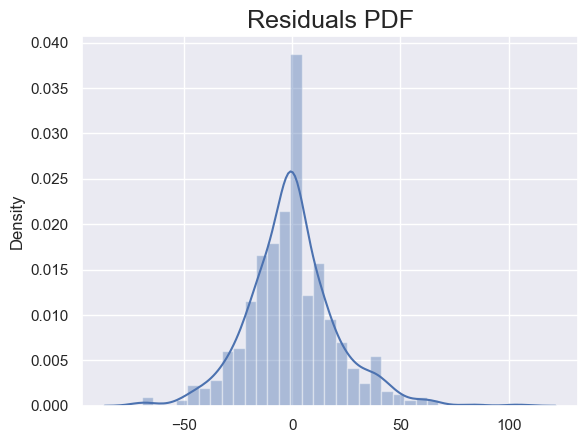

In [17]:
sns.distplot(y_train - y_hat)

plt.title("Residuals PDF", size=18)

In [18]:
np.mean(cross_val_score(lm,X_train,y_train, scoring = 'neg_mean_absolute_error', cv= 3))

-20.78246464471067

In [19]:
# lasso regression 
lm_l = Lasso(alpha=.13)
lm_l.fit(X_train,y_train)
np.mean(cross_val_score(lm_l,X_train,y_train, scoring = 'neg_mean_absolute_error', cv= 3))

-19.163224535772304

In [42]:
lm_l.score(X_train,y_train)

0.6715346018758561

In [20]:
alpha = []
error = []

for i in range(1,100):
    alpha.append(i/100)
    lml = Lasso(alpha=(i/100))
    error.append(np.mean(cross_val_score(lml,X_train,y_train, scoring = 'neg_mean_absolute_error', cv= 3)))

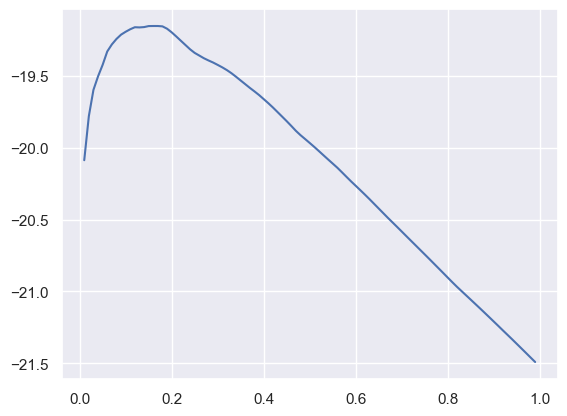

In [21]:
plt.plot(alpha,error)

In [22]:
err = tuple(zip(alpha,error))
df_err = pd.DataFrame(err, columns = ['alpha','error'])
df_err[df_err.error == max(df_err.error)]

,alpha,error
15,0.16,-19.153381


## Random Forest 

In [23]:
# random forest 
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

In [24]:
np.mean(cross_val_score(rf,X_train,y_train,scoring = 'neg_mean_absolute_error', cv= 3))

-15.154475807140782

In [25]:
# tune models GridsearchCV 
from sklearn.model_selection import GridSearchCV
parameters = {'n_estimators': range(10, 300, 10), 'criterion': ('squared_error', 'absolute_error'), 'max_features': ('auto', 'sqrt', 'log2')}

In [30]:
gs = GridSearchCV(rf,parameters,scoring='neg_mean_absolute_error',cv=3)
gs.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid={'criterion': ('squared_error', 'absolute_error'),
                         'max_features': ('auto', 'sqrt', 'log2'),
                         'n_estimators': range(10, 300, 10)},
             scoring='neg_mean_absolute_error')

In [44]:
rf.fit(X_train,y_train)
rf.score(X_train,y_train)

0.9607803905030505

In [27]:
gs.best_score_
gs.best_estimator_

RandomForestRegressor(max_features='sqrt', n_estimators=220)

In [36]:
# test ensembles 
tpred_lm = lm.predict(X_test)
tpred_lml = lm_l.predict(X_test)
tpred_rf = gs.best_estimator_.predict(X_test)

In [34]:
from sklearn.metrics import mean_absolute_error

In [31]:
mean_absolute_error(y_test,tpred_lml)

19.695367578540573

In [32]:
mean_absolute_error(y_test,tpred_rf)

11.750625381330078